In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [13]:
df=pd.read_csv(r"G:\users\spotify dataset.csv")

In [14]:
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [20]:
df.dropna(inplace=True)


In [30]:
columns_to_drop = ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre']


In [31]:
columns_to_drop = [col for col in columns_to_drop if col in df.columns]


In [32]:
df_new = df.drop(columns_to_drop, axis=1)

In [33]:
df_new

,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2019-06-14,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,2019-12-13,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,2019-07-05,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,2019-07-19,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,2019-03-05,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,2014-04-28,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,2013-03-08,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,2014-04-21,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2014-01-01,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [36]:
df_numeric = df.select_dtypes(include=[np.number])


In [37]:
df_numeric.fillna(df_numeric.mean(), inplace=True)


In [38]:
scaler = StandardScaler()
scaled_df_new = scaler.fit_transform(df_numeric)

In [39]:
scaled_df_new

array([[ 0.6420147 ,  1.20166767,  0.17334847, ...,  0.03192873,
         0.04283347, -0.51880218],
       [ 0.4903842 ,  0.6433885 ,  1.55780825, ...,  0.78252502,
        -0.77729134, -1.05617475],
       [ 0.13887713,  1.28458042, -1.21111132, ...,  0.43939529,
         0.11613324, -0.82193285],
       ...,
       [-0.86739801,  0.6765536 ,  0.17334847, ..., -0.31977924,
         0.26410808, -0.26213215],
       [-0.19884535,  1.04689721, -0.93421936, ..., -0.86878681,
         0.26481432,  2.3670727 ],
       [-0.35736815,  1.02478714, -0.10354349, ..., -1.8063888 ,
         0.26392223,  1.86683522]])

In [44]:
scaled_df = pd.DataFrame(scaled_df_new, columns=df_numeric.columns)

In [45]:
scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.642015,1.201668,0.173348,1.367040,0.876132,-0.481253,-0.333961,-0.377985,-0.809246,0.031929,0.042833,-0.518802
1,0.490384,0.643388,1.557808,0.585736,0.876132,-0.688547,-0.468726,-0.359210,1.081094,0.782525,-0.777291,-1.056175
2,0.138877,1.284580,-1.211111,1.100025,-1.141381,-0.324301,-0.436856,-0.377881,-0.519571,0.439395,0.116133,-0.821933
3,0.435246,1.279053,0.450240,0.984251,0.876132,-0.049884,-0.667687,-0.377943,0.089589,-1.001750,0.039860,-0.947661
4,-0.033430,0.742884,-1.211111,0.685114,0.876132,-0.702366,-0.432758,-0.377985,-0.692598,0.919777,0.114944,-0.614097
...,...,...,...,...,...,...,...,...,...,...,...,...
32823,-1.563520,1.234833,-0.934219,1.641416,0.876132,-0.132801,-0.449604,-0.377985,-0.799525,-1.289121,0.270836,-0.358012
32824,-0.915644,0.483091,-1.488003,0.755381,0.876132,-0.642152,-0.790570,-0.358943,1.197742,-0.474188,0.266041,2.127884
32825,-0.867398,0.676554,0.173348,0.609159,-1.141381,-0.581938,-0.306644,-0.377980,-0.260354,-0.319779,0.264108,-0.262132
32826,-0.198845,1.046897,-0.934219,1.123782,0.876132,0.019214,-0.762296,0.188369,0.990369,-0.868787,0.264814,2.367073


In [46]:
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

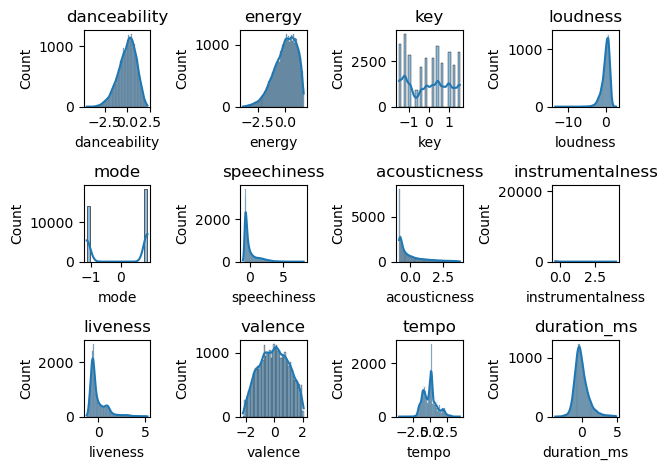

In [50]:
for i, column in enumerate(scaled_df.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(scaled_df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


In [51]:
plt.show()

In [52]:
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

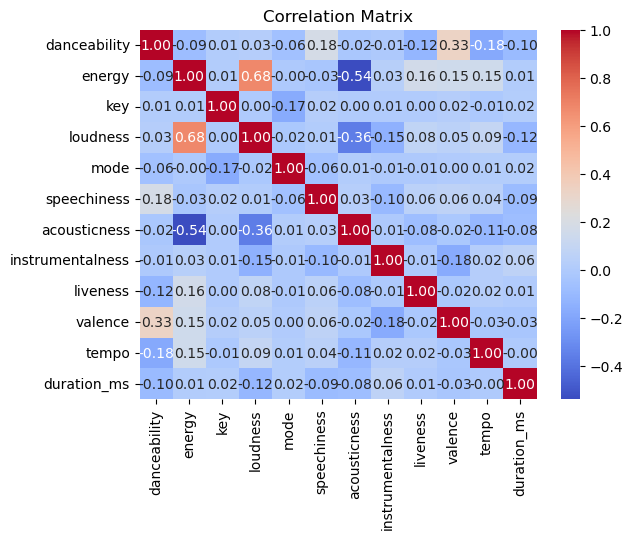

In [53]:
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

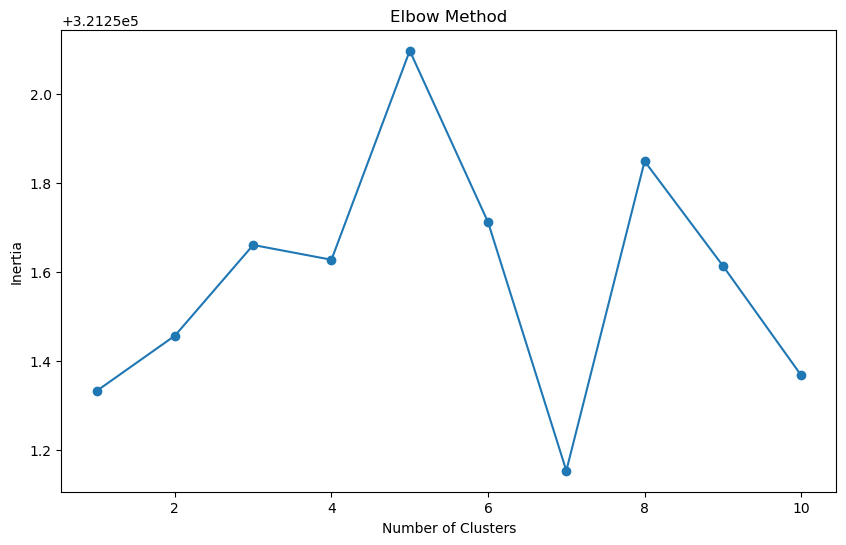

In [56]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=3, n_init=10)
    kmeans.fit(scaled_df_new)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [57]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_df_new)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [58]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df_new)


In [59]:
pca_data

array([[-1.54015767, -0.52737014],
       [-1.08992386, -0.87978676],
       [-1.63887147, -0.64423259],
       ...,
       [-0.95043506,  0.54782207],
       [-1.69345714,  1.57892798],
       [-1.77405303,  2.58717218]])

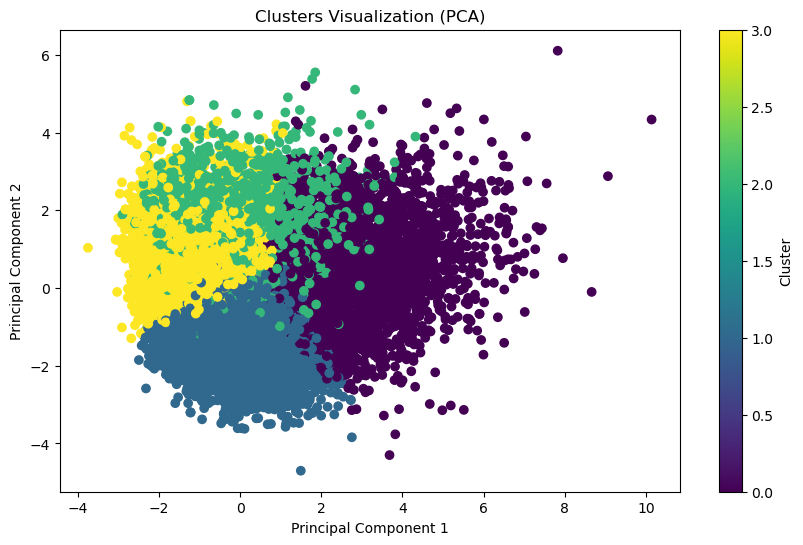

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()